In [64]:
£Starting with Basic Libraries
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("mammographic_masses.data.txt",na_values=['?'],names=['BI-RADS','AGE','SHAPE',"MARGIN","DENSITY","SEVERITY"])

In [3]:
df.head()

,BI-RADS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [4]:
#961 data but we can see that few values are missing in 5 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS     959 non-null float64
AGE         956 non-null float64
SHAPE       930 non-null float64
MARGIN      913 non-null float64
DENSITY     885 non-null float64
SEVERITY    961 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


In [5]:
df.describe()

,BI-RADS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [6]:
#See missing values

import missingno as ms

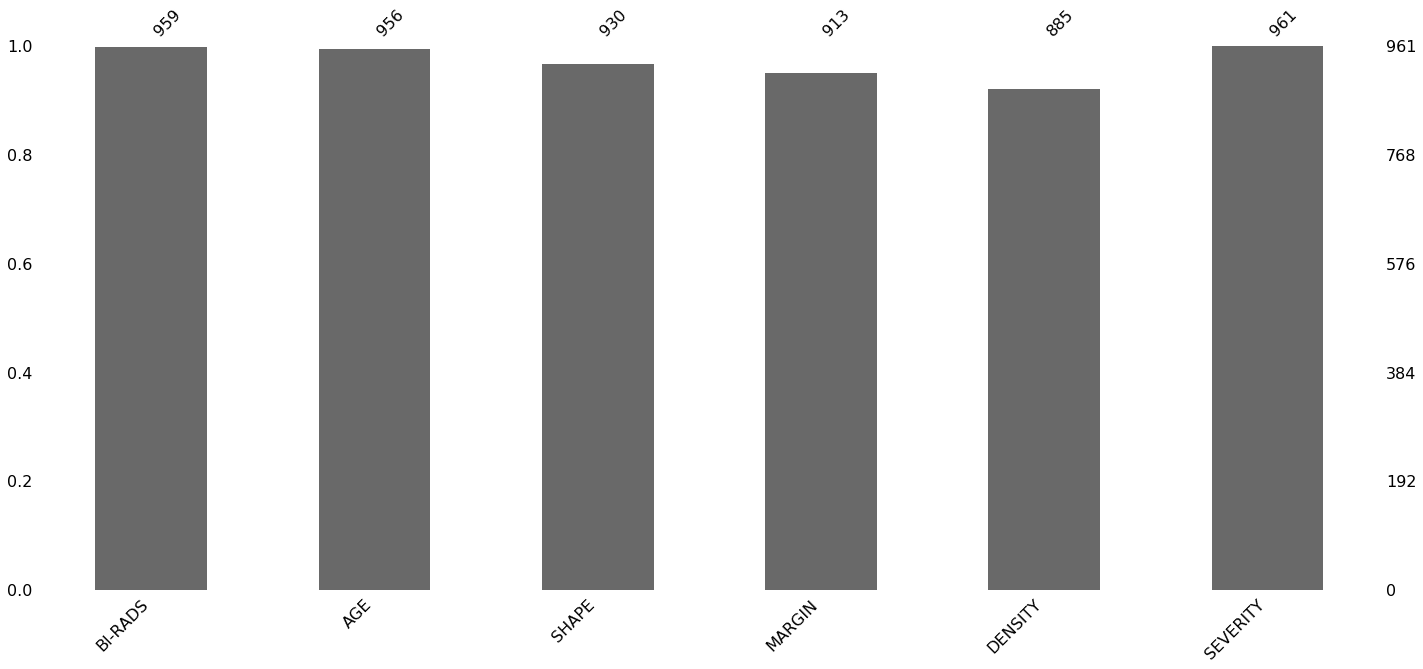

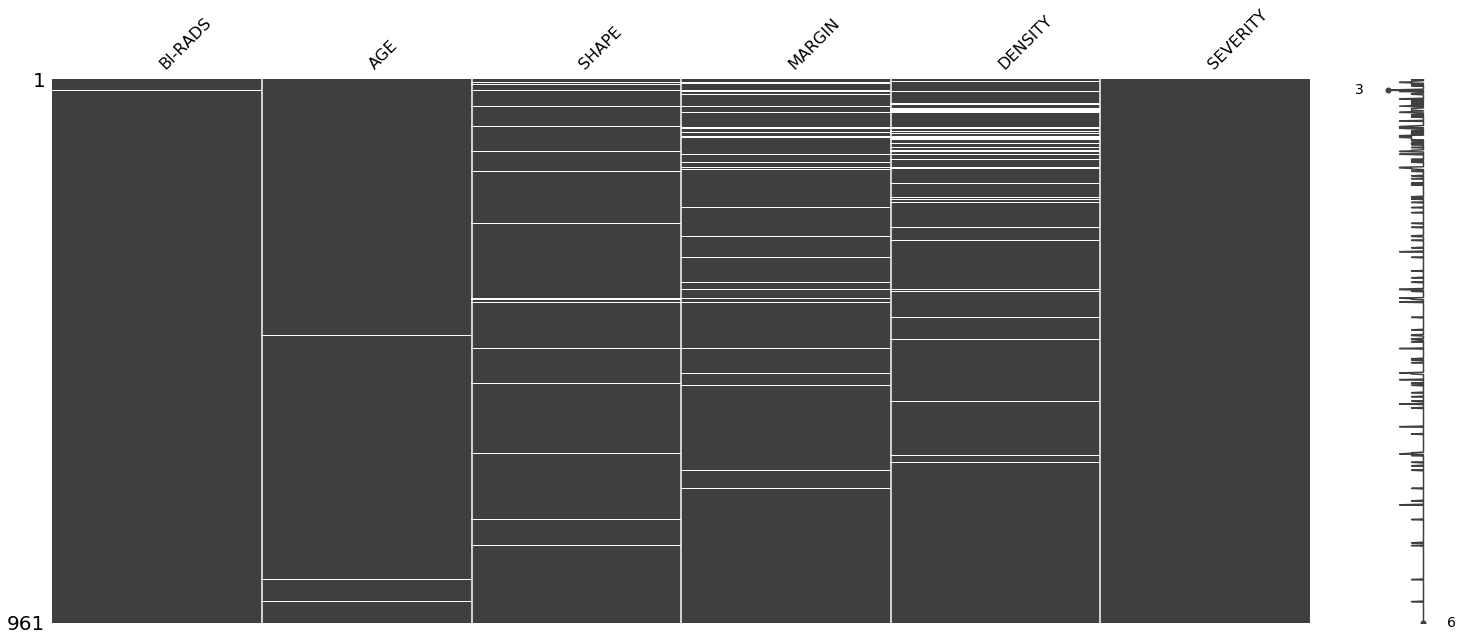

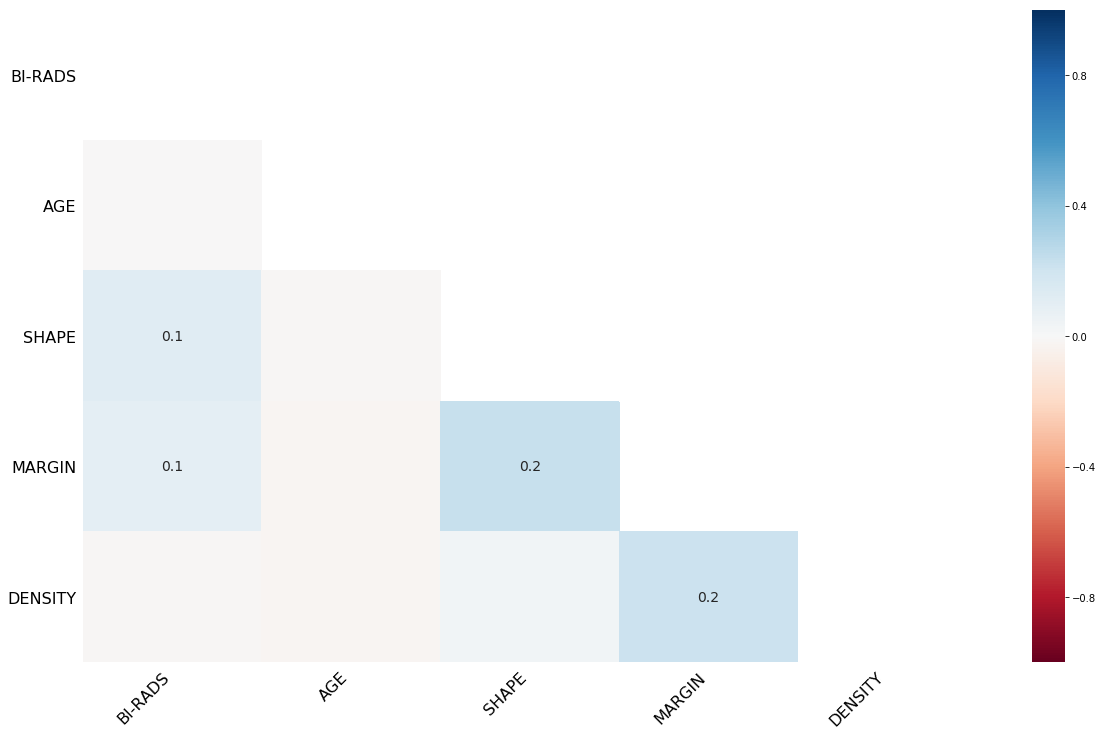

In [7]:
ms.bar(df)
ms.matrix(df)
ms.heatmap(df)


In [8]:
df.isna().sum()

BI-RADS      2
AGE          5
SHAPE       31
MARGIN      48
DENSITY     76
SEVERITY     0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Missing_Values')

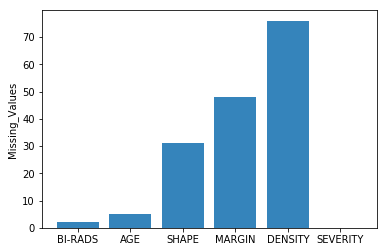

In [10]:
plt.bar(df.columns,df.isna().sum(),alpha=0.9)
plt.ylabel("Missing_Values")

In [11]:
#Drop the missing data,create copy of data

df1=df

In [12]:
df.dropna(inplace=True)

In [13]:
df.describe()

#As we can see, there is no missing data left now.

,BI-RADS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [14]:
#Now we will convert our data into numpy arrays as sklearn works well with arrays.


all_features = df[['BI-RADS','AGE', 'SHAPE',
                             'MARGIN', 'DENSITY']].values


Y =df['SEVERITY'].values

feature_names = ['AGE', 'SHAPE', 'MARGIN', 'DENSITY']

all_features

array([[ 5., 67.,  3.,  5.,  3.],
       [ 5., 58.,  4.,  5.,  3.],
       [ 4., 28.,  1.,  1.,  3.],
       ...,
       [ 4., 64.,  4.,  5.,  3.],
       [ 5., 66.,  4.,  5.,  3.],
       [ 4., 62.,  3.,  3.,  3.]])

In [15]:
#Normalise the data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(all_features)

In [16]:
X

array([[ 0.3211177 ,  0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.3211177 ,  0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-0.20875843, -1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [-0.20875843,  0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.3211177 ,  0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [-0.20875843,  0.42406719,  0.17563638,  0.11923341,  0.24046607]])

In [17]:
df.corr()

,BI-RADS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
BI-RADS,1.000000,0.094623,0.180120,0.157771,0.028356,0.223826
AGE,0.094623,1.000000,0.380096,0.420913,0.052417,0.455216
SHAPE,0.180120,0.380096,1.000000,0.738014,0.073969,0.564763
MARGIN,0.157771,0.420913,0.738014,1.000000,0.124860,0.574498
DENSITY,0.028356,0.052417,0.073969,0.124860,1.000000,0.068651
SEVERITY,0.223826,0.455216,0.564763,0.574498,0.068651,1.000000


In [18]:
#We will use Boruta for feature selection

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [19]:
#First step is building a RFC, as per boruta creators suggestion

rf=RandomForestClassifier(n_jobs=-1,class_weight='balanced',max_depth=5)

In [20]:
#Now use Boruta
bor=BorutaPy(rf,n_estimators='auto')

In [21]:
bor

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=100, n_jobs=-1,
                                          oob_score=False, random_state=None,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100, random_state=N

In [22]:
bor.fit(all_features,Y)

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=63, n_jobs=-1,
                                          oob_score=False,
                                          random_state=<mtrand.RandomState object at 0x119a742d0>,
                                          verbose=0, warm_sta

In [23]:
bor.support_

array([ True,  True,  True,  True, False])

In [24]:
bor.n_features_

4

In [25]:
#Fit the selected features

X=bor.transform(all_features)

In [26]:
#Sampling

from sklearn.model_selection import train_test_split

In [27]:
np.random.seed(1234)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75)


In [28]:
#Start with decision tree

from sklearn.tree import DecisionTreeClassifier

In [29]:
m1=DecisionTreeClassifier()
m1.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
p1=m1.predict(X_test)
p1

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [31]:
m1.score(X_test,Y_test)

0.7932692307692307

In [32]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [33]:
acc=accuracy_score(p1,Y_test)
rec=recall_score(p1,Y_test)
pre=precision_score(p1,Y_test)

In [34]:
print(acc,rec,pre)

0.7932692307692307 0.7340425531914894 0.7931034482758621


# Lets Build Random Forest 

In [35]:
#Now We will use K-Fold Validation instead of one train-test split

In [36]:
from sklearn.model_selection import cross_val_score



In [37]:
DT1=DecisionTreeClassifier(random_state=1)
cv_DT=cross_val_score(DT1,X,Y,cv=9)

In [38]:
cv_DT.mean()

0.7746220975533737

Decision Tree=77%

In [39]:
#Ensemble Method

from sklearn.ensemble import RandomForestClassifier

In [40]:
RF=RandomForestClassifier(n_estimators=10,random_state=1)
RF_score=cross_val_score(RF,X,Y,cv=9)
RF_score.mean()

0.7927120669056154

Random Forest=79%

# SUPPORT VECTOR MACHINE

In [41]:
from sklearn.svm import SVC

In [42]:
SVM=SVC(kernel='rbf')

SVM_score=cross_val_score(SVM,X,Y,cv=9)
SVM_score.mean()

0.7867643239312243

#Linear=81.41%
#Poly=80.47%
#Gaussain Kernel (rbf)=82.62%
#Sigmoid Kernel=76.51%

#Hence we will go for Gaussian Radial Basis Kernel


# K-Nearest Neighbor

In [50]:
from sklearn import neighbors
KNN=neighbors.KNeighborsClassifier(n_neighbors=41)
KNN_score=cross_val_score(KNN,X,Y,cv=9)
KNN_score.mean()

0.7855695808009974

In [51]:
#Now iterate

for i in range(1,50):
    KNN=neighbors.KNeighborsClassifier(n_neighbors=i)
    KNN_score=cross_val_score(KNN,X,Y,cv=9)
    print(i,KNN_score.mean())

1 0.750415562827905
2 0.7517012103267363
3 0.7915303101137604
4 0.7963482416497843
5 0.8144252246636539
6 0.8095943067892578
7 0.8035686457846346
8 0.7963222689730404
9 0.7915432964521324
10 0.7987766869253545
11 0.7988156459404706
12 0.7939717417277025
13 0.7976079164718715
14 0.8060360500753209
15 0.8072437795439198
16 0.8024128616695237
17 0.7988416186172146
18 0.7988416186172147
19 0.8061009817671808
20 0.8085034543660069
21 0.7988416186172146
22 0.8012700638927848
23 0.8036855228299828
24 0.8036725364916109
25 0.7988546049555867
26 0.7952184302114176
27 0.7964261596800166
28 0.7964261596800166
29 0.7952054438730456
30 0.7928029712742195
31 0.7976468754869876
32 0.7928159576125915
33 0.7928029712742195
34 0.7940107007428185
35 0.7915952418056205
36 0.7891797828684224
37 0.7879850397381953
38 0.7928029712742196
39 0.7807646356033452
40 0.7807516492649733
41 0.7855695808009974
42 0.7831411355254273
43 0.7831541218637993
44 0.7807646356033453
45 0.7831671082021713
46 0.781959378733572

#Lets Finalise n=40, KNN Accuracy=80.60%

# Naive Bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
NB=MultinomialNB()
NB_score=cross_val_score(NB,X,Y,cv=9)
NB_score.mean()

0.7216897823489689

In [54]:
#As we can see there is an error because Naive Bayes only accepts non-negative values
from sklearn.preprocessing import MinMaxScaler
#Lets convert the data
scaler1=MinMaxScaler()
X_nonnegative=scaler1.fit_transform(X)

In [55]:
X_nonnegative

#As you can see values are between 0-1 range

array([[0.09090909, 0.62820513, 0.66666667, 1.        ],
       [0.09090909, 0.51282051, 1.        , 1.        ],
       [0.07272727, 0.12820513, 0.        , 0.        ],
       ...,
       [0.07272727, 0.58974359, 1.        , 1.        ],
       [0.09090909, 0.61538462, 1.        , 1.        ],
       [0.07272727, 0.56410256, 0.66666667, 0.5       ]])

In [56]:
#Lets Implement the Model

NB=MultinomialNB()
NB_score=cross_val_score(NB,X_nonnegative,Y,cv=10)
NB_score.mean()

0.719277108433735

Naive Bayes=78.23%

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
LOR=LogisticRegression()
LOR_score=cross_val_score(LOR,X,Y,cv=9)
LOR_score.mean()

0.8252688172043012

#Checking accuracy by feeding non negative data and normalized data

#With Non-neg data Accuracy=80.60%
#Normalized Data Accuracy=82.22%

# Neural Network

In [59]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [60]:
def neuralnetwork():
    model=Sequential()

#Input Layer
    model.add(Dense(10,activation='relu'))

#Donot require output layer
#model.add(Dense(6,activation='relu'))

#OutPut layer for Binary Classification,sigmoid for binary classification 0-beining,1=malignant
    model.add(Dense(6,activation='sigmoid'))

#Compile

    model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

    return model

In [61]:
#Keras Classifier

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [62]:
NN=KerasClassifier(build_fn=neuralnetwork,epochs=44,verbose=0)
NN_score=cross_val_score(NN,X,Y,cv=10)
NN_score.mean()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


0.737349396944046

In [63]:
NN_score.mean()

0.737349396944046